In [65]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator

import seaborn as sns

import pandas as pd

import warnings

import numpy as np

import scipy.stats as st
from scipy.optimize import OptimizeWarning

warnings.filterwarnings("ignore", message="Workbook contains no default style")

FILE_PATH = 'C:\\Users\\vladi\\.vscode\\Git\\SM_25\\SM_25\\cursova\\'
RUN_TIME = 1440.0

In [66]:
def get_verification():
    filename = 'verification'
    full_path = f"{FILE_PATH}{filename}.xlsx"
    df = pd.read_excel(full_path, engine="openpyxl")

    df = df.groupby('test_mask').mean().reset_index()

    return df

get_verification()

,test_mask,prod_served,mean_q_size,q_served,m_loader_util,m_truck_util,productivity,processing_time
0,0,179.918,1.541203,88.041,0.540709,0.877053,0.058919,66.706542
1,1,359.606,41.808176,96.012,0.586722,0.954073,0.064122,694.443753
2,2,179.503,0.400123,89.301,0.371038,0.806685,0.060363,41.264343
3,3,179.630,0.325476,89.422,0.548849,0.727205,0.060656,34.601244
4,4,179.542,1.061080,88.684,0.543884,0.846346,0.059599,55.717263
5,5,179.863,1.250957,88.507,0.421213,0.881076,0.059320,61.592945
6,6,179.874,0.423912,89.498,0.551079,0.755547,0.060210,47.744446


In [67]:
def get_trans_period():
    filename = 'trans'
    full_path = f"{FILE_PATH}{filename}.xlsx"
    df = pd.read_excel(full_path, engine="openpyxl")

    df = df.groupby('test_mask').mean().reset_index()
    
    return df

trans = get_trans_period()
trans

,test_mask,prod_served,mean_q_size,q_served,m_loader_util,m_truck_util,productivity,processing_time
0,0,179.627,1.514139,87.980,0.540263,0.875334,0.058906,66.314243
1,4000,179.971,2.973912,89.881,0.559170,0.922638,0.062453,87.106076
2,8000,180.272,3.363263,90.084,0.562922,0.925356,0.062563,93.194815
3,12000,180.002,3.290178,89.953,0.560911,0.923993,0.062469,92.110265
4,16000,179.936,3.306585,89.899,0.559215,0.923128,0.062481,92.230227


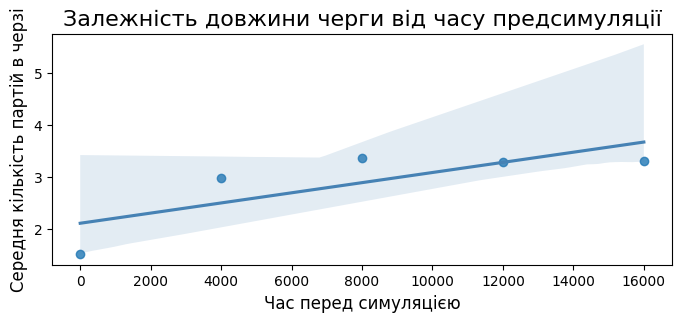

In [ ]:
plt.figure(figsize=(8, 3)) 

sns.regplot(
    data=trans,
    x='test_mask',
    y='mean_q_size',
    scatter=True,
    line_kws={"color": "#4682b4"},
)

plt.title('Залежність довжини черги від часу предсимуляції', fontsize=16)
plt.xlabel('Час перед симуляцією', fontsize=12)
plt.ylabel('Середня кількість партій в черзі', fontsize=12)

plt.show()

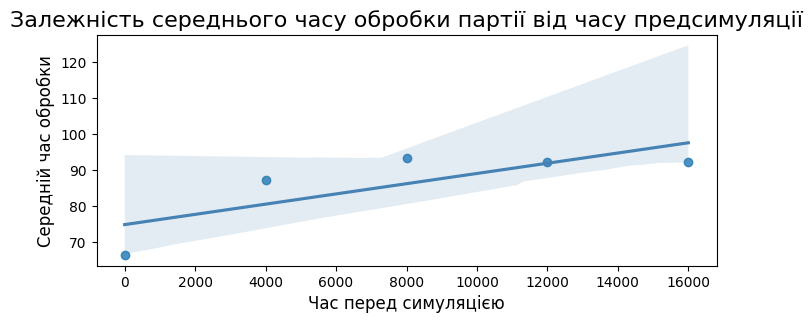

In [69]:
plt.figure(figsize=(8, 3)) 

sns.regplot(
    data=trans,
    x='test_mask',
    y='processing_time',
    scatter=True,
    line_kws={"color": "#4682b4"},
)

plt.title('Залежність середнього часу обробки партії від часу предсимуляції', fontsize=16)
plt.xlabel('Час перед симуляцією', fontsize=12)
plt.ylabel('Середній час обробки', fontsize=12)

plt.show()

Text(0, 0.5, 'Середня продуктивність')

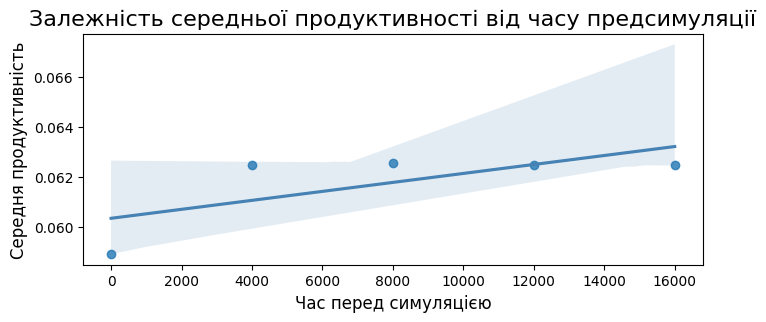

In [70]:
plt.figure(figsize=(8, 3)) 

sns.regplot(
    data=trans,
    x='test_mask',
    y='productivity',
    scatter=True,
    line_kws={"color": "#4682b4"},
)

plt.title('Залежність середньої продуктивності від часу предсимуляції', fontsize=16)
plt.xlabel('Час перед симуляцією', fontsize=12)
plt.ylabel('Середня продуктивність', fontsize=12)

In [71]:
def get_result():
    filename = 'result'
    full_path = f"{FILE_PATH}{filename}.xlsx"
    df = pd.read_excel(full_path, engine="openpyxl")

    return df

result = get_result()
result

,test_mask,prod_served,mean_q_size,q_served,m_loader_util,m_truck_util,productivity,processing_time
0,0,178,8.099381,94,0.557310,0.979834,0.064583,166.084398
1,0,197,2.475880,96,0.574992,0.937684,0.064583,78.990614
2,0,180,2.867321,94,0.536452,0.986273,0.063889,86.605226
3,0,183,4.547767,91,0.622655,0.966402,0.064583,110.830130
4,0,174,0.918239,85,0.594125,0.923587,0.058333,59.820220
...,...,...,...,...,...,...,...,...
995,0,193,4.063868,96,0.613652,0.957382,0.067361,99.778000
996,0,201,2.424825,99,0.545015,0.954548,0.067361,75.155870
997,0,173,0.645902,88,0.562631,0.872736,0.058333,53.050949
998,0,196,6.930484,92,0.611551,0.912482,0.061806,153.047914


In [72]:
df = result

In [73]:
def get_best_distribution(data):
    dist_names = ["norm", "expon", "lognorm", "uniform", 'beta']
    dist_results = []
    params = {}
    
    # Get data for the histogram
    y, x = np.histogram(data, bins='auto', density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Temporarily suppress warnings during the fitting loop
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        
        for dist_name in dist_names:
            dist = getattr(st, dist_name)
            try:
                # Special handling for Beta: check boundaries
                if dist_name == 'beta':
                    if np.min(data) < 0 or np.max(data) > 1:
                        # Beta does not work outside [0, 1], skip
                        continue
                
                # fit() might throw RuntimeWarning, which we ignore via catch_warnings
                param = dist.fit(data)
                
                params[dist_name] = param
                
                # Calculate PDF
                arg = param[:-2]
                loc = param[-2]
                scale = param[-1]
                pdf = dist.pdf(x, loc=loc, scale=scale, *arg)
                
                # Check for NaN (if fitting passed but produced garbage)
                if np.any(np.isnan(pdf)):
                    continue

                sse = np.sum(np.power(y - pdf, 2.0))
                dist_results.append((dist_name, sse))
            except Exception:
                # If fit fails with an error - just move on
                continue
    
    if dist_results:
        best_dist, best_sse = sorted(dist_results, key=lambda x: x[1])[0]
        return best_dist, params[best_dist]
    return None, None

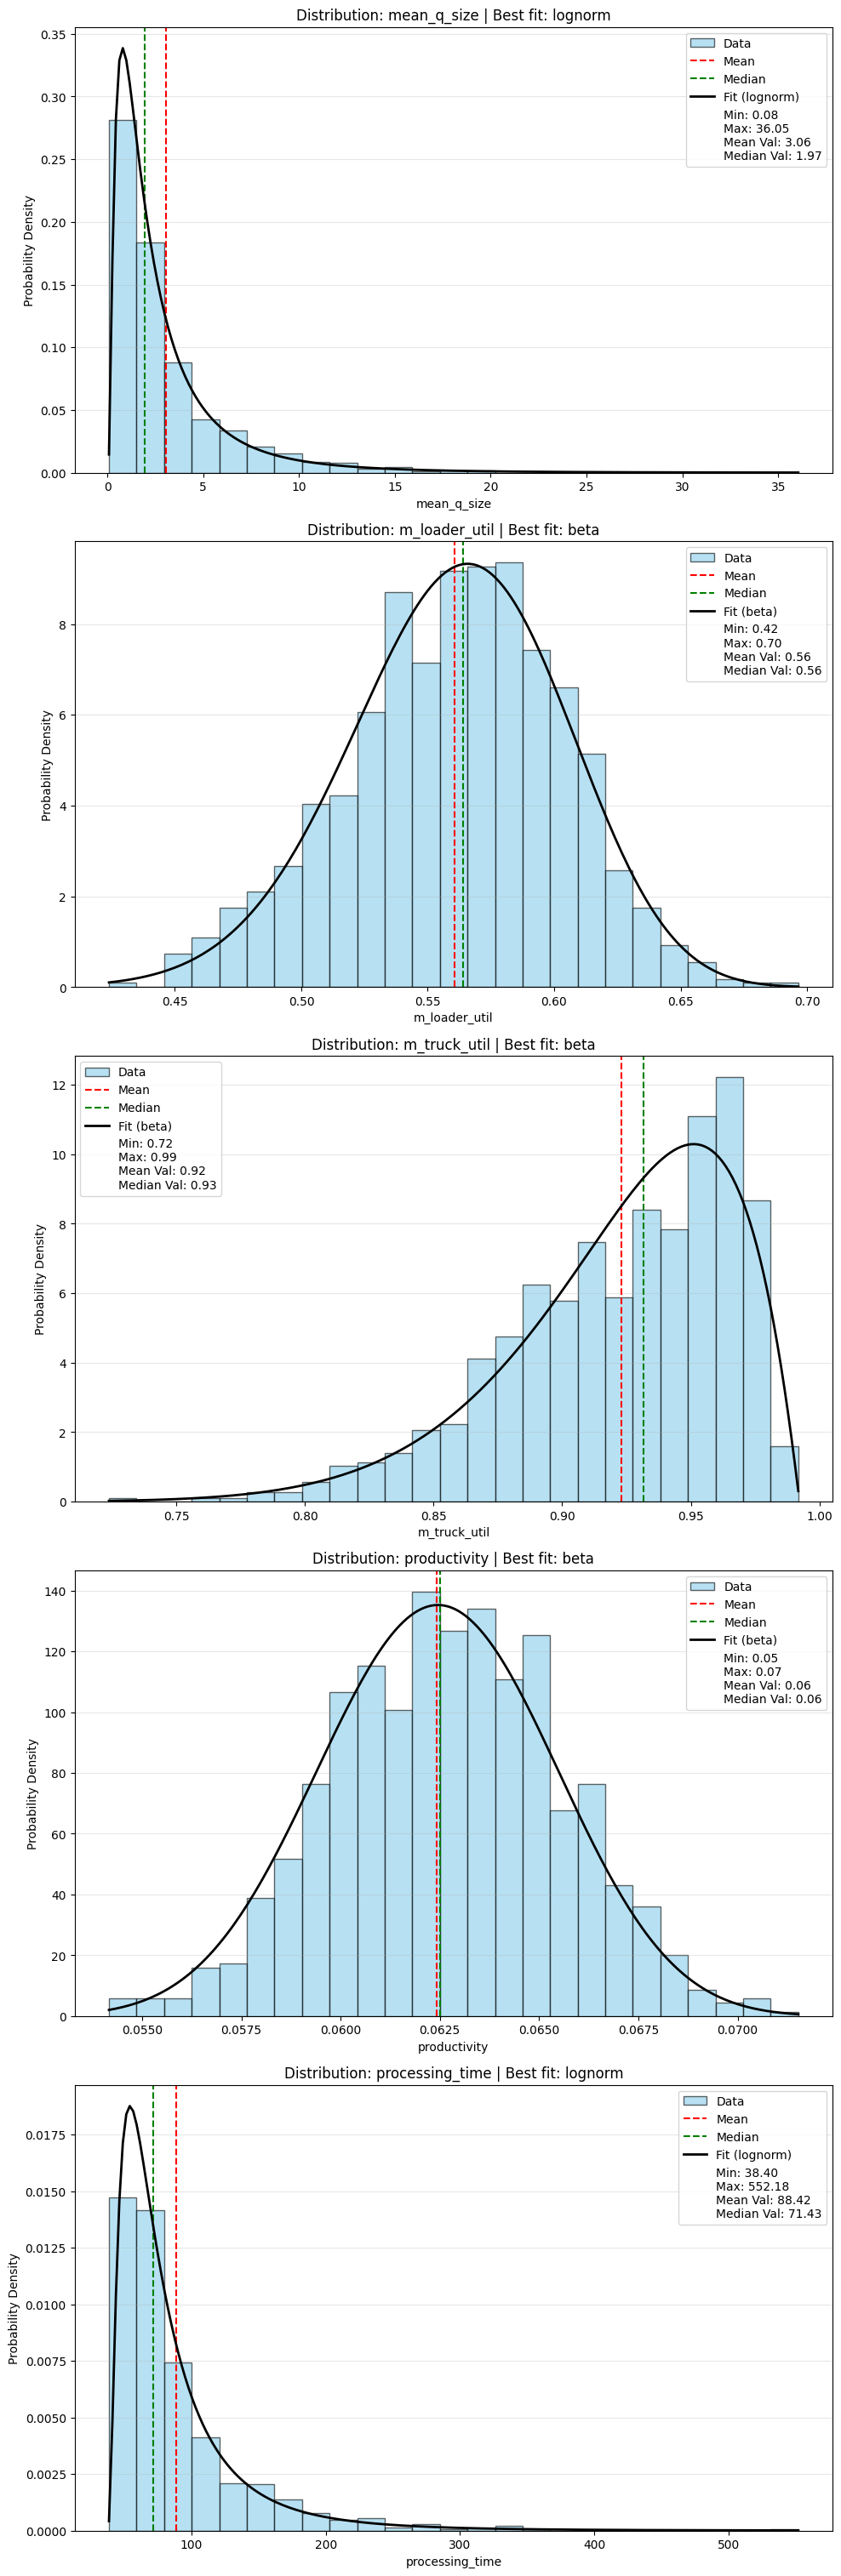

In [75]:
columns_to_plot = [
    'mean_q_size',
    'm_loader_util', 
    'm_truck_util', 
    'productivity', 
    'processing_time',
]

num_plots = len(columns_to_plot)
cols = 1 
rows = (num_plots + 1) // cols

plt.figure(figsize=(10, 6 * rows))

for i, col_name in enumerate(columns_to_plot):
    if col_name in df.columns:
        ax = plt.subplot(rows, cols, i + 1)
        
        # Remove NaNs for correct fitting
        data_clean = df[col_name].dropna()
        
        # 1. Histogram (density=True is needed to overlay the distribution curve)
        plt.hist(data_clean, bins=25, density=True, color='skyblue', edgecolor='black', alpha=0.6, label='Data')
        
        # 2. Statistical metrics
        mean_val = data_clean.mean()
        median_val = data_clean.median()
        min_val = data_clean.min()
        max_val = data_clean.max()
        
        # Mean and Median lines (Added labels here for the legend)
        plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label='Mean')
        plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label='Median')
        
        # 3. Distribution detection and visualization
        best_dist_name, best_dist_params = get_best_distribution(data_clean)
        
        dist_title_add = ""
        if best_dist_name:
            dist_title_add = f" | Best fit: {best_dist_name}"
            
            # Draw the curve
            x_linspace = np.linspace(min_val, max_val, 200)
            dist = getattr(st, best_dist_name)
            arg = best_dist_params[:-2]
            loc = best_dist_params[-2]
            scale = best_dist_params[-1]
            y_pdf = dist.pdf(x_linspace, loc=loc, scale=scale, *arg)
            
            # Black line: The best fitted distribution
            plt.plot(x_linspace, y_pdf, 'k-', linewidth=2, label=f'Fit ({best_dist_name})')

        # 4. Legend construction
        # Create a text block for Min/Max stats (Mean/Median are now lines in the legend)
        stats_label = (f'Min: {min_val:.2f}\n'
                       f'Max: {max_val:.2f}\n'
                       f'Mean Val: {mean_val:.2f}\n'
                        f'Median Val: {median_val:.2f}')
        
        # "Empty" element to display text in the legend
        stats_patch = mpatches.Patch(color='none', label=stats_label)
        
        # Get current legend handles and add the stats block
        handles, labels = ax.get_legend_handles_labels()
        handles.append(stats_patch)
        
        plt.title(f'Distribution: {col_name}{dist_title_add}')
        plt.xlabel(col_name)
        plt.ylabel('Probability Density')
        plt.legend(handles=handles)
        plt.grid(axis='y', alpha=0.3)
    else:
        print(f"Warning: Column '{col_name}' not found in DataFrame")

plt.tight_layout()
plt.show()